In [1]:
# #                                                      About this file
# #  Pregnancies: Number of times pregnant
# #  Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
# #  BloodPressure: Diastolic blood pressure (mm Hg)
# #  SkinThickness: Triceps skin fold thickness (mm)
# #  Insulin: 2-Hour serum insulin (mu U/ml)
# #  BMI: Body mass index (weight in kg/(height in m)^2)
# #  DiabetesPedigreeFunction: Diabetes pedigree function
# #  Age: Age (years)
# #  Outcome: Class variable (0 or 1)

# import librarrys 

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


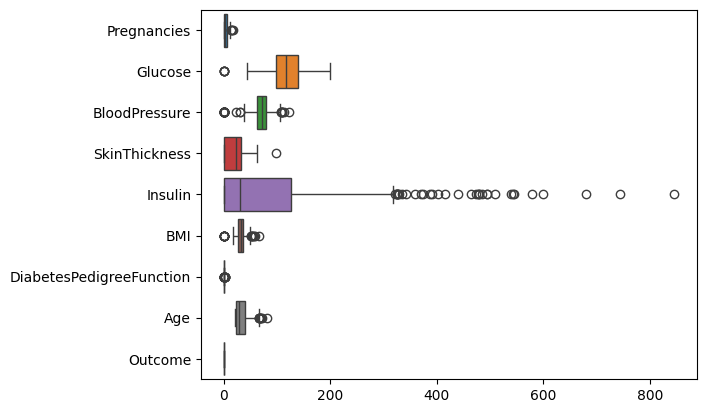

In [7]:
 sns.boxplot(data=df,orient='h')
plt.show()

In [8]:
# shape before removing outlier 
df.shape 

(768, 9)

# removing outlier in insuline

In [9]:
df = df[df['Insulin']<df['Insulin'].quantile(0.99)]

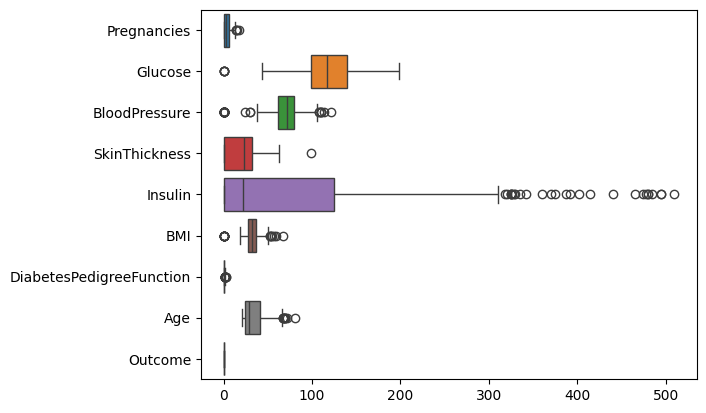

In [10]:
sns.boxplot(data=df,orient='h')
plt.show()

In [11]:
# shape after removing outliers in data set
df.shape

(760, 9)

# univeriate analysis

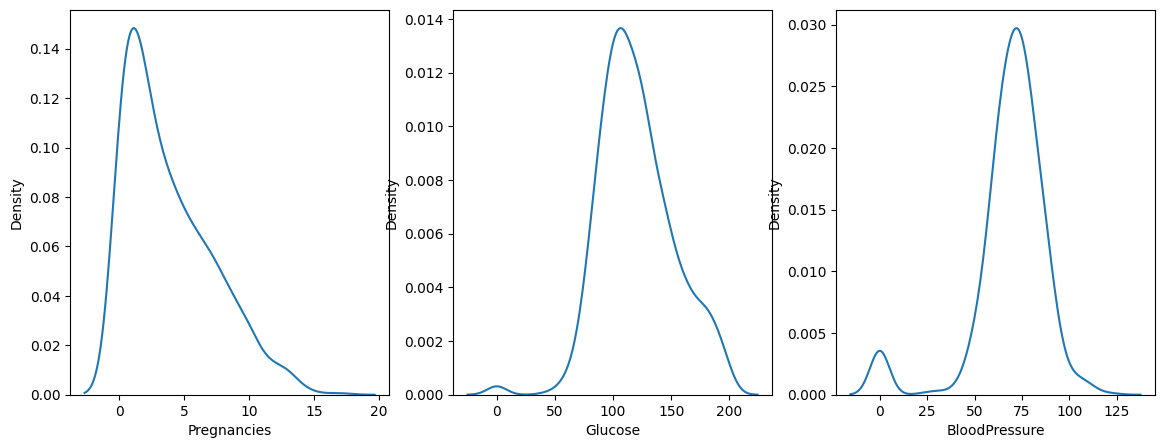

In [12]:
fig, (axes1, axes2, axes3)= plt.subplots(1,3, figsize=(14,5))
sns.kdeplot(data=df['Pregnancies'],ax=axes1)
sns.kdeplot(data=df['Glucose'],ax=axes2)
sns.kdeplot(data=df['BloodPressure'],ax=axes3)
plt.show()

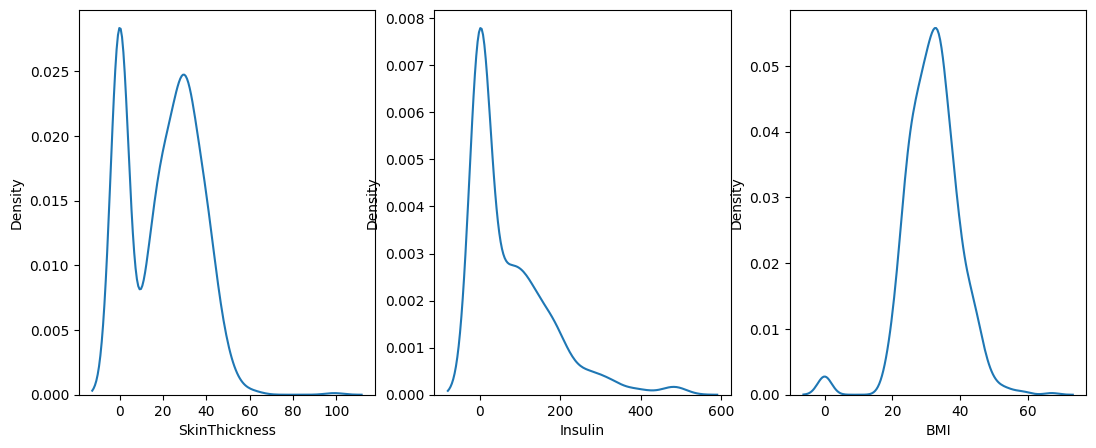

In [13]:
fig, (axes4,axes5, axes6)= plt.subplots(1,3, figsize=(13,5))
sns.kdeplot(data=df['Insulin'],ax=axes5)
sns.kdeplot(data=df['BMI'],ax=axes6)
sns.kdeplot(data=df['SkinThickness'],ax=axes4)
plt.show()

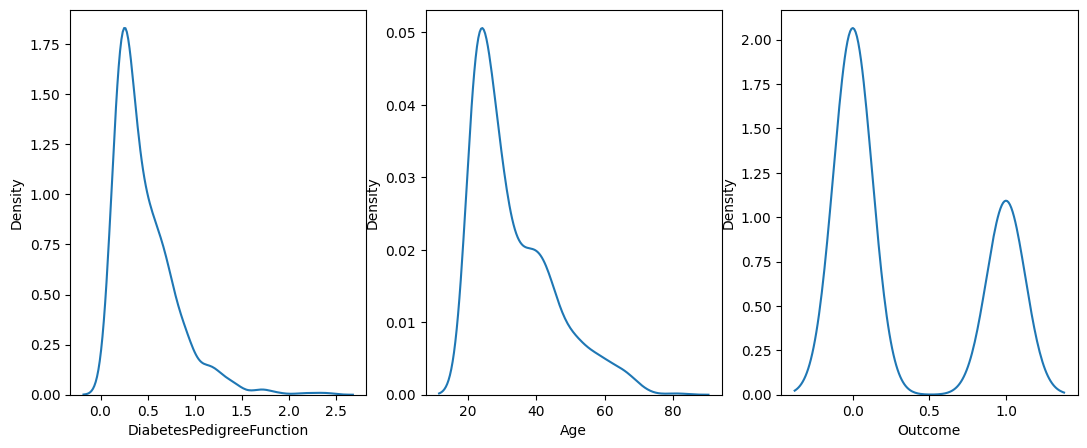

In [14]:
fig, (axes7,axes8,axes9)= plt.subplots(1,3, figsize=(13,5))
sns.kdeplot(data=df['DiabetesPedigreeFunction'],ax=axes7)
sns.kdeplot(data=df['Age'],ax=axes8)
sns.kdeplot(data=df['Outcome'],ax=axes9)
plt.show()

In [15]:
df['Outcome'].value_counts().reset_index()

,Outcome,count
0,0,497
1,1,263


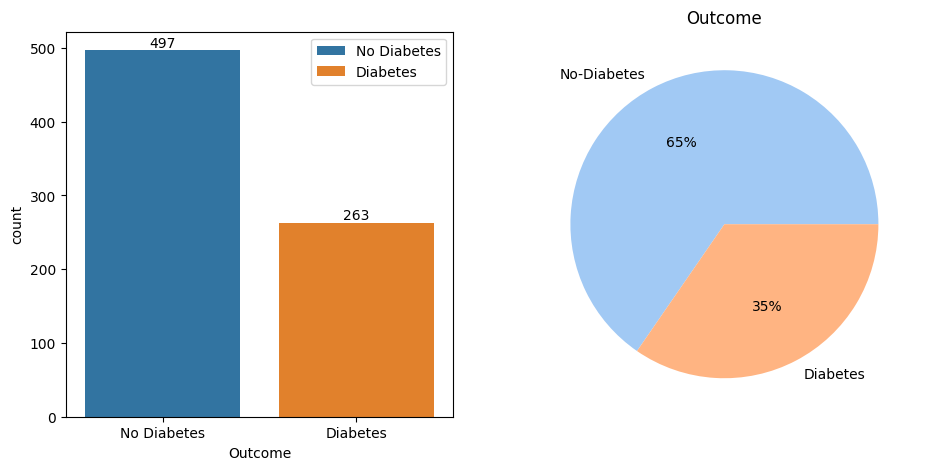

In [16]:
fig, (axes1, axes2) = plt.subplots(1,2,figsize=(11,5))
X1 = sns.countplot(data=df, x='Outcome',hue='Outcome',ax=axes1)
for x in X1.containers:
    X1.bar_label(x)
axes1.set_xticks([0,1],['No Diabetes','Diabetes'])
axes1.legend(labels=['No Diabetes','Diabetes'])

palette_color = sns.color_palette('pastel')
axes2.pie(df['Outcome'].value_counts(),labels=['No-Diabetes','Diabetes'],colors=palette_color,autopct='%.0f%%')
axes2.set_title('Outcome')
plt.show()

# Baivariet  analysis 

In [17]:
df['Pregnancies'].value_counts()

Pregnancies
1     133
0     110
2     101
3      75
4      67
5      56
6      50
7      45
8      37
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

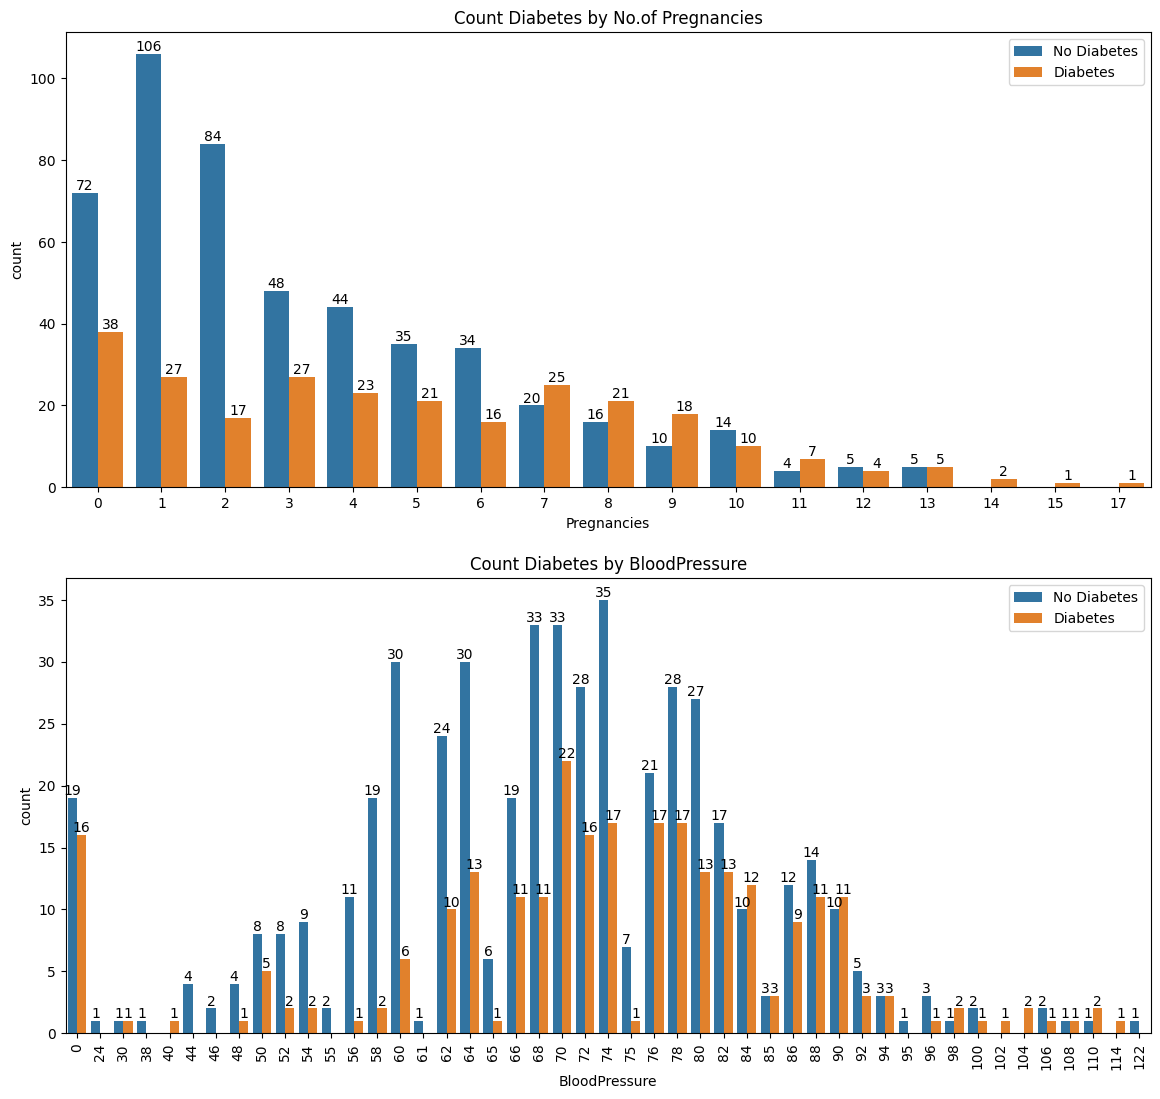

In [18]:
fig,(axes1,axes2) = plt.subplots(2,1,figsize=(14,13))
a = sns.countplot(data=df, x='Pregnancies' ,hue='Outcome',ax=axes1)
for x in a.containers:
    a.bar_label(x)
axes1.legend(labels=['No Diabetes','Diabetes'])
axes1.set_title('Count Diabetes by No.of Pregnancies')
b = sns.countplot(data=df, x='BloodPressure' ,hue='Outcome',ax=axes2)
for x in b.containers:
    b.bar_label(x)
axes2.legend(labels=['No Diabetes','Diabetes'])
axes2.set_title('Count Diabetes by BloodPressure')
axes2.tick_params(axis='x', rotation=90)
plt.show()


# Multivariate analysis

In [20]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.139892,0.141520,-0.078805,-0.066434,0.023692,-0.036882,0.549059,0.226310
Glucose,0.139892,1.000000,0.154483,0.041520,0.295527,0.215345,0.127173,0.261808,0.468469
BloodPressure,0.141520,0.154483,1.000000,0.206952,0.097152,0.280873,0.040512,0.242664,0.069291
SkinThickness,-0.078805,0.041520,0.206952,1.000000,0.456171,0.389565,0.180389,-0.117463,0.071634
Insulin,-0.066434,0.295527,0.097152,0.456171,1.000000,0.191871,0.170401,-0.077405,0.119709
BMI,0.023692,0.215345,0.280873,0.389565,0.191871,1.000000,0.139903,0.043352,0.298303
DiabetesPedigreeFunction,-0.036882,0.127173,0.040512,0.180389,0.170401,0.139903,1.000000,0.036962,0.185848
Age,0.549059,0.261808,0.242664,-0.117463,-0.077405,0.043352,0.036962,1.000000,0.233129
Outcome,0.226310,0.468469,0.069291,0.071634,0.119709,0.298303,0.185848,0.233129,1.000000


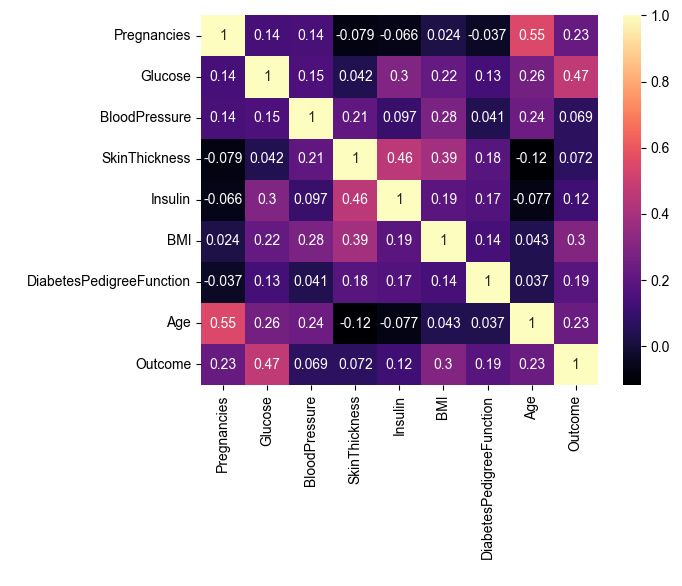

In [21]:
sns.heatmap(df.corr(),annot=True,cmap='magma')
sns.set(rc={'figure.figsize':(20,6)})
plt.show()

In [22]:
df.corr()['Glucose']

Pregnancies                 0.139892
Glucose                     1.000000
BloodPressure               0.154483
SkinThickness               0.041520
Insulin                     0.295527
BMI                         0.215345
DiabetesPedigreeFunction    0.127173
Age                         0.261808
Outcome                     0.468469
Name: Glucose, dtype: float64

# Train test split 

In [23]:
x  = df.drop(['Outcome'],axis=1)
y = df['Outcome']

In [24]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2)

In [25]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
433,2,139,75,0,0,25.6,0.167,29
430,2,99,0,0,0,22.2,0.108,23
385,1,119,54,13,50,22.3,0.205,24
107,4,144,58,28,140,29.5,0.287,37
394,4,158,78,0,0,32.9,0.803,31
...,...,...,...,...,...,...,...,...
582,12,121,78,17,0,26.5,0.259,62
452,0,91,68,32,210,39.9,0.381,25
248,9,124,70,33,402,35.4,0.282,34
457,5,86,68,28,71,30.2,0.364,24


In [26]:
y_train

433    0
430    0
385    0
107    0
394    1
      ..
582    0
452    0
248    0
457    0
760    0
Name: Outcome, Length: 608, dtype: int64

# Convert y_train into dataframe

In [27]:
y_train = pd.DataFrame(data = y_train,dtype=int)
y_test = pd.DataFrame(data = y_test,dtype=int)

In [28]:
y_train

,Outcome
433,0
430,0
385,0
107,0
394,1
...,...
582,0
452,0
248,0
457,0


In [29]:
y_test

,Outcome
259,1
21,0
492,0
200,0
167,0
...,...
172,0
234,0
627,0
539,1


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [44]:
lo = LogisticRegression()
lo.fit(x_train,y_train)

C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
y_pred_train = lo.predict(x_test)

In [46]:
a = accuracy_score(y_test,y_pred_train)
print(a)

0.75


In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
dt = DecisionTreeClassifier()

In [49]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [50]:
y_pred = dt.predict(x_test)

In [51]:
b = accuracy_score(y_test,y_pred)
print(b)

0.6907894736842105


In [52]:
print(f"LogisticRegression accuracy score is : {a}")
print(f"DecisionTreeClassifier accuracy score is : {b}")

LogisticRegression accuracy score is : 0.75
DecisionTreeClassifier accuracy score is : 0.6907894736842105


In [53]:
input_data  = np.array([[0,105,64,41,142,41.5,0.173,22]])
y_predict = lo.predict(input_data)
print(y_predict) 

if y_predict==1:
    print('Diabetes')
else:
    print('No-Diabetes')

[0]
No-Diabetes


C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [54]:
input_data  = np.array([[8,133,72,0,0,32.9,0.27,39]])
Y_predict = dt.predict(input_data)
print(Y_predict)
if Y_predict==1:
    print("Diabetes")
else:
    print("No-Diabetes")

[1]
Diabetes


C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [55]:
import pickle

In [57]:
pickle.dump(lo,open('lo.pkl','wb'))